<a href="https://colab.research.google.com/github/alfathroziqq/PCD_Assignment_3_Kelompok/blob/main/Tugas_3_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [1]:
import cv2
import io
import matplotlib.pyplot as plt
import numpy as np
import requests
from google.colab import files
from PIL import Image
from io import BytesIO
from scipy.ndimage import convolve
from PIL import Image as PILImage
from scipy import ndimage

## **1. Sobel**

Saving plat2.png to plat2 (2).png


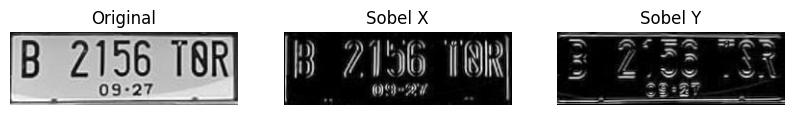

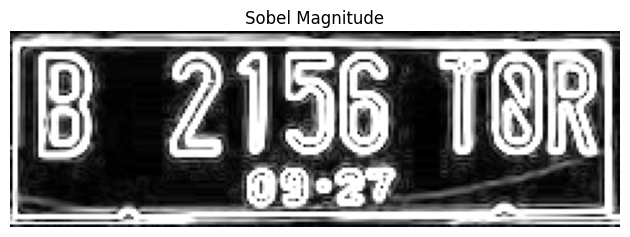

In [ ]:
uploaded = files.upload()

for fname in uploaded.keys():
    image_bytes = uploaded[fname]
    pil_image = PILImage.open(io.BytesIO(image_bytes)).convert('L')
    image = np.array(pil_image)
    break

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_magnitude = np.uint8(np.clip(sobel_magnitude, 0, 255))

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sobel X")
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Sobel Y")
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.axis('off')

plt.figure()
plt.title("Sobel Magnitude")
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

##**2. Prewit**

Saving pexels-photo-57905.webp to pexels-photo-57905 (3).webp


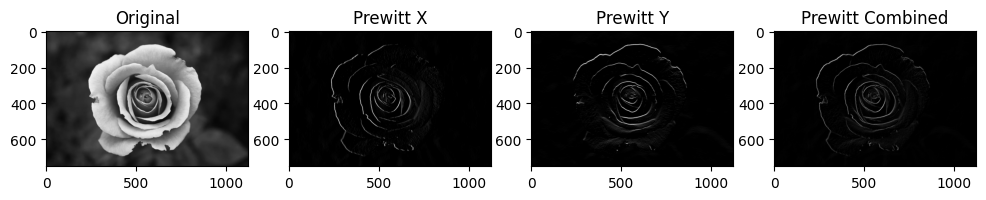

In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
  img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_GRAYSCALE)

kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

img_prewitt_x = cv2.filter2D(img, -1, kernel_x)
img_prewitt_y = cv2.filter2D(img, -1, kernel_y)
img_prewitt = cv2.addWeighted(img_prewitt_x, 0.5, img_prewitt_y, 0.5, 0)

plt.figure(figsize=(12, 6))
plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(142), plt.imshow(img_prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(143), plt.imshow(img_prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.subplot(144), plt.imshow(img_prewitt, cmap='gray'), plt.title('Prewitt Combined')
plt.show()

## **3. Robert**

Saving Screenshot 2025-04-12 000806.png to Screenshot 2025-04-12 000806.png


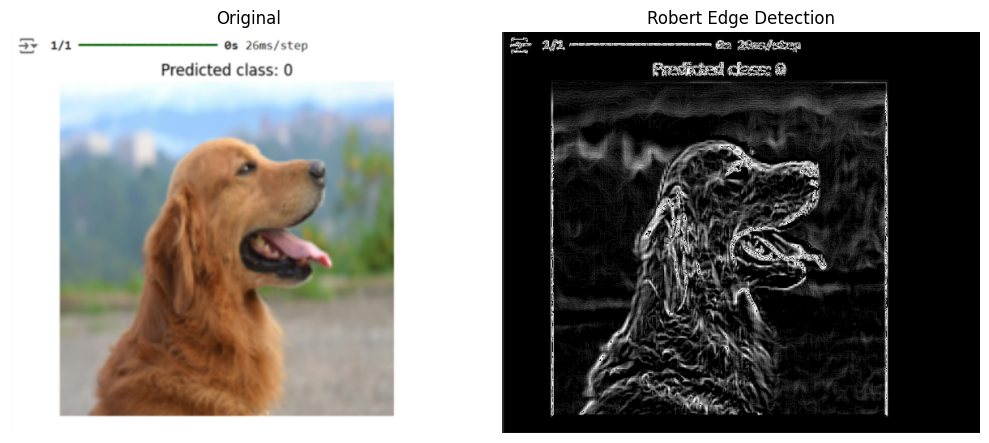

In [6]:
def roberts_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kernel_x = np.array([[1, 0],
                         [0, -1]], dtype=int)

    kernel_y = np.array([[0, 1],
                         [-1, 0]], dtype=int)

    edge_x = cv2.filter2D(gray, -1, kernel_x)
    edge_y = cv2.filter2D(gray, -1, kernel_y)

    edge_roberts = np.sqrt(np.square(edge_x) + np.square(edge_y))
    edge_roberts = np.clip(edge_roberts, 0, 255).astype(np.uint8)

    return edge_roberts


uploaded = files.upload()
filename = next(iter(uploaded))

image = Image.open(BytesIO(uploaded[filename]))
image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

edge_image = roberts_edge_detection(image_cv)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Robert Edge Detection")
plt.imshow(edge_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## **4. Laplacian of Gaussian Filtering**

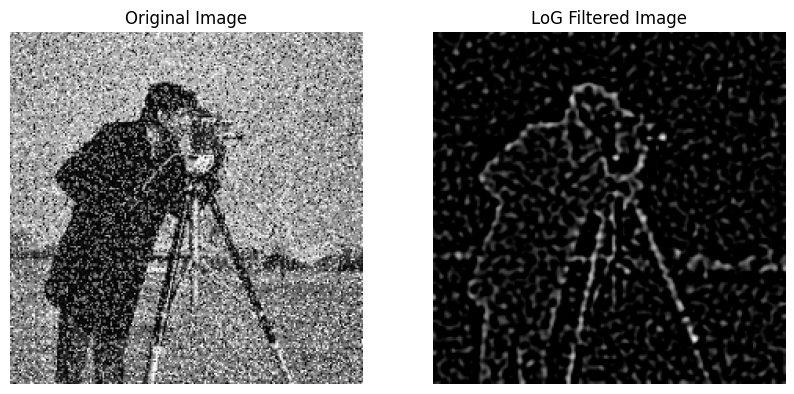

In [ ]:
def LoGFilter(image, sigma, size=None):
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = cv2.filter2D(image, -1, kernel)

    return result

def showImage(image1, image2):
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(image1, cmap="gray")
  plt.title("Original Image")
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.imshow(image2, cmap="gray")
  plt.title("LoG Filtered Image")
  plt.axis("off")
  plt.show()



def main(sigma):
  image_url = "https://cdn.discordapp.com/attachments/657883669569994766/1355401038194282496/images_13.jpg?ex=67e8cb15&is=67e77995&hm=103fa293a987e9683743bb31b83a9c7feaa9793bc94773e3fd5fe3f29e7ca03d&"
  response = requests.get(image_url)
  image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
  image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

  filtered_image = LoGFilter(image, sigma)
  filtered_image = cv2.convertScaleAbs(filtered_image)
  showImage(image, filtered_image)

if __name__ == "__main__":
  # Parameter sigma untuk mengatur tingkat penghalusan pada gambar
  main(2.0)

## **5. Operator Kompas**

Pilih gambar:


Saving pexels-photo-57905.webp to pexels-photo-57905 (2).webp


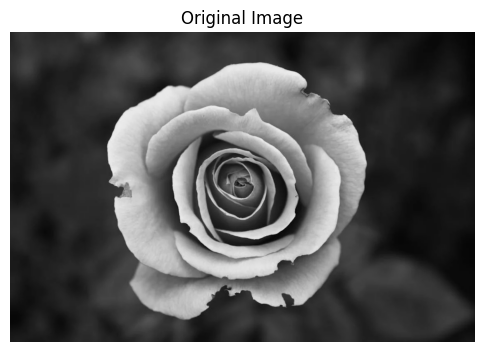

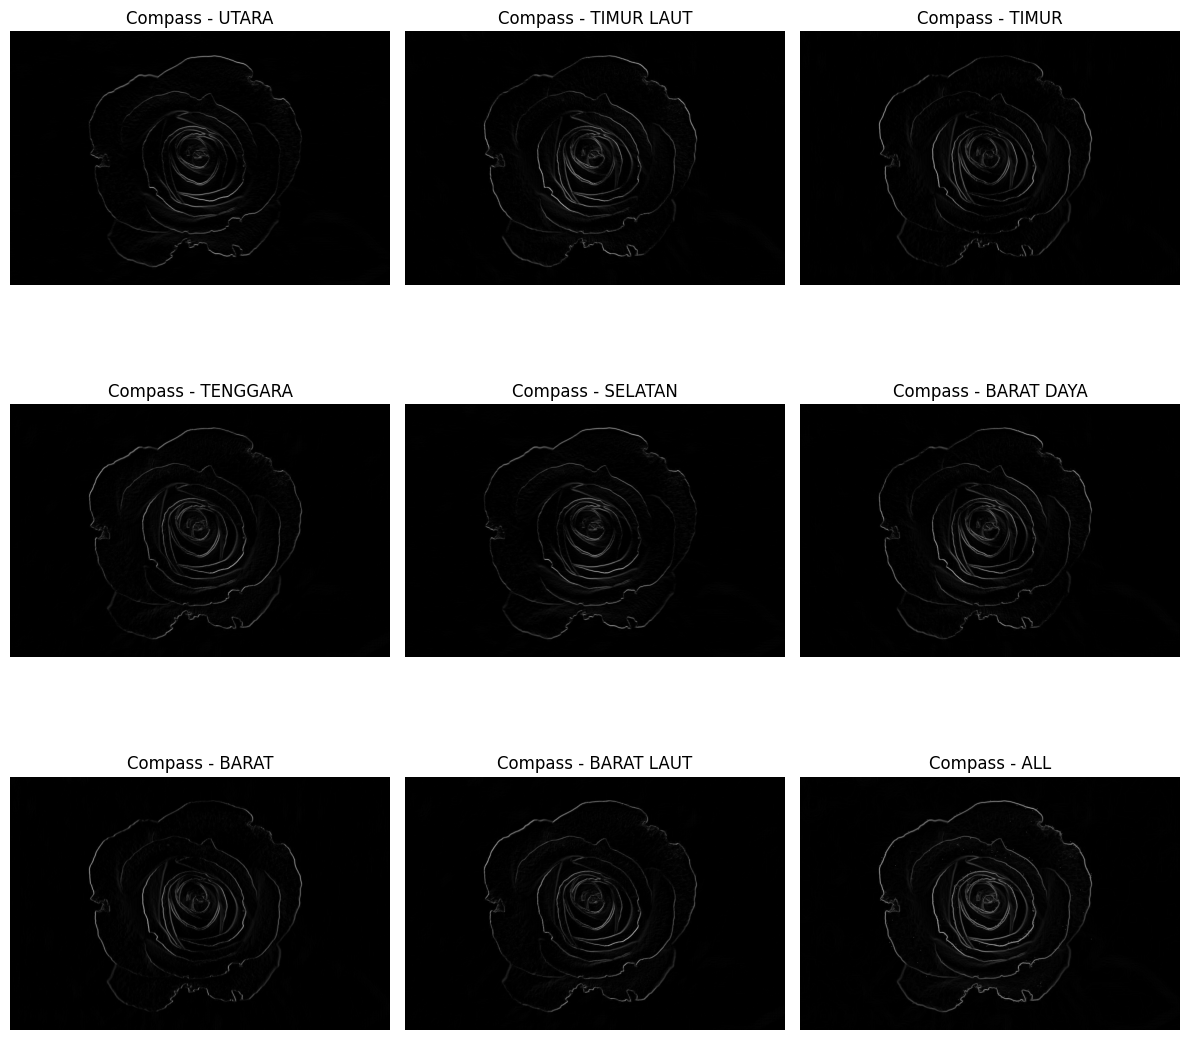

In [5]:
def compass_operator(image, direction='all'):
    img_gray = np.array(image.convert('L')).astype(float)

    compass_filters = {
        'Utara': np.array([[1, 1, 1], [1, -2, 1], [-1, -1, -1]]),
        'Timur Laut': np.array([[1, 1, 1], [-1, -2, 1], [-1, -1, 1]]),
        'Timur': np.array([[-1, 1, 1], [-1, -2, 1], [-1, 1, 1]]),
        'Tenggara': np.array([[-1, -1, 1], [-1, -2, 1], [1, 1, 1]]),
        'Selatan': np.array([[-1, -1, -1], [1, -2, 1], [1, 1, 1]]),
        'Barat Daya': np.array([[1, -1, -1], [1, -2, -1], [1, 1, 1]]),
        'Barat': np.array([[1, 1, -1], [1, -2, -1], [1, 1, -1]]),
        'Barat Laut': np.array([[1, 1, 1], [1, -2, -1], [1, -1, -1]])
    }

    if direction != 'all':
        gradient = ndimage.convolve(img_gray, compass_filters[direction])
        gradient = np.abs(gradient)
    else:
        responses = []
        for kernel in compass_filters.values():
            response = ndimage.convolve(img_gray, kernel)
            responses.append(response)
        gradient = np.max(np.array(responses), axis=0)

    gradient = (gradient / gradient.max() * 255).astype(np.uint8)
    return Image.fromarray(gradient)

print("Pilih gambar:")
uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(BytesIO(uploaded[filename]))

    if img.mode != 'RGB':
        img = img.convert('RGB')

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    directions = ['Utara', 'Timur Laut', 'Timur', 'Tenggara', 'Selatan', 'Barat Daya', 'Barat', 'Barat Laut']

    plt.figure(figsize=(12, 12))
    for i, direction in enumerate(directions):
        result = compass_operator(img, direction)
        plt.subplot(3, 3, i+1)
        plt.imshow(result, cmap='gray')
        plt.title(f"Compass - {direction.upper()}")
        plt.axis("off")

    all_result = compass_operator(img, direction='all')
    plt.subplot(3, 3, 9)
    plt.imshow(all_result, cmap='gray')
    plt.title("Compass - ALL")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
